# Configure Capacity with Nodes and Layers
The capacity of a deep learning neural network model controls the scope of the mapping functions
that it is able to learn. A model with too little capacity cannot learn the training dataset
meaning it will underfit, whereas a model with too much capacity may memorize the training
dataset, meaning it will overfit or may get stuck or lost during the optimization process. The
capacity of a neural network model is defined by configuring the number of nodes and the
number of layers. In this tutorial, you will discover how to control the capacity of a neural
network model and how capacity impacts what a model is capable of learning. After completing
this tutorial, you will know:
* Neural network model capacity is controlled both by the number of nodes and the number
of layers in the model.
* A model with a single hidden layer and sufficient number of nodes has the capability of
learning any mapping function, but the chosen learning algorithm may or may not be able
to realize this capability.
* Increasing the number of layers provides a short-cut to increasing the capacity of the model
with fewer resources, and modern techniques allow learning algorithms to successfully
train deep models.

## Neural Network Model Capacity
The goal of a neural network is to learn how to map input examples to output examples. Neural
networks learn mapping functions. The capacity of a network refers to the range or scope of the
functions that the model can approximate.
Informally, a model's capacity is its ability to fit a wide variety of functions.

The capacity of a neural network can be controlled by two aspects of the model:
* Number of Nodes.
* Number of Layers.
A model with more nodes or more layers has a greater capacity and, in turn, is potentially
capable of navigating a larger set of mapping functions.

The number of nodes in a layer is referred to as the width. Developing wide networks with one
layer and many nodes was relatively straightforward. In theory, a network with enough nodes
in the single hidden layer can learn to approximate any mapping function, although in practice,
we don't know how many nodes are suficient or how to train such a model. The number of
layers in a model is referred to as its depth. Increasing the depth increases the capacity of the
model. Training deep models, e.g. those with many hidden layers, can be computationally more
efficient than training a single layer network with a vast number of nodes.

Modern deep learning provides a very powerful framework for supervised learning.
By adding more layers and more units within a layer, a deep network can represent
functions of increasing complexity.

## Configuring Model Layers
Layers are added to a sequential model via calls to the add() function and passing in the layer.
Fully connected layers for the MLP can be added via repeated calls to the add() function
passing in the configured Dense layers; for example:
```python
model = Sequential()
model.add(Dense(32))
model.add(Dense(64))
```

Similarly, the number of layers for a recurrent network can be added in the same way
to give a stacked recurrent model. Convolutional layers can be stacked directly, and it is common to stack one or two convolutional layers together followed by a pooling layer, then repeat this pattern of layers. More about these network structures in later modules.

# Model Capacity Case Study
In this section, we will demonstrate how to use model capacity to control learning with a
MLP on a simple classification problem. This example provides a template for exploring model
capacity with your own neural network for classication and regression problems.

## Multiclass Classification Problem

We will use a standard multiclass classification problem as the basis to demonstrate the eect
of model capacity on model performance. The scikit-learn class provides the make blobs()
function that can be used to create a multiclass classification problem with the prescribed
number of samples, input variables, classes, and variance of samples within a class. We can
configure the problem to have a specific number of input variables via the n features argument,
and a specific number of classes or centers via the centers argument. The random state can
be used to seed the pseudorandom number generator to ensure that we always get the same
samples each time the function is called. For example, the call below generates 1,000 examples
for a three class problem with two input variables.

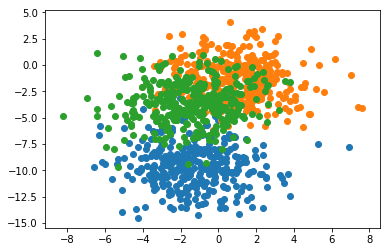

In [0]:
# scatter plot of blobs dataset
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from numpy import where
import numpy
%matplotlib inline
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, 
                  cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()


# Change Model Capacity With Nodes
In this section, we will develop a Multilayer Perceptron model, or MLP, for the blobs multiclass
classification problem and demonstrate the effect that the number of nodes has on the ability
of the model to learn. We can start off by developing a function to prepare the dataset. The
input and output elements of the dataset can be created using the make blobs() function as
described in the previous section. Next, the target variable must be one hot encoded. This is so
that the model can learn to predict the probability of an input example belonging to each of the
20 classes. We can use the to categorical() Keras utility function to do this, for example:

```python
# one hot encode output variable
# convert class 1 to 1 0 0
# convert class 2 to 0 1 0
# convert class 3 to 0 0 1
y = to_categorical(y)
```

Next, we can split the 1,000 examples in half and use 500 examples as the training dataset
and 500 to evaluate the model.

```python
# prepare multiclass classification dataset
def create_dataset():
# generate 2d classification dataset
   ......
   # split into train and test
   n_train = 500
   trainX, testX = X[:n_train, :], X[n_train:, :]
   trainy, testy = y[n_train:], y[n_train:]
   return trainX, trainy, testX, testy
```
Here, we will review the performance of the model with a hidden consisting of  1 to 7
nodes. We would expect that increasing the number of nodes would increase the capacity of the
model and allow the model to better learn the training dataset, at least to a point limited by
the chosen configuration for the learning algorithm (e.g. learning rate, batch size, and epochs).
The test accuracy for each configuration will be printed and the learning curves of training
accuracy with each configuration will be plotted.

nodes=1: 0.114
nodes=2: 0.392
nodes=3: 0.706
nodes=4: 0.928
nodes=5: 0.878
nodes=6: 0.958
nodes=7: 1.000


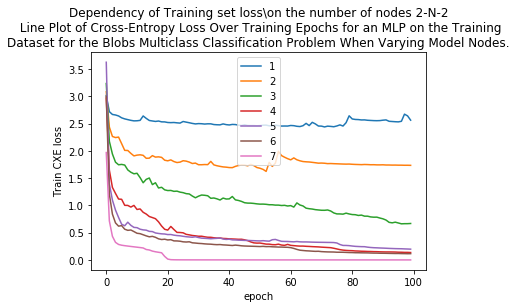

In [0]:
# study of mlp learning curves given different number of nodes for multi-class classification
from sklearn.datasets.samples_generator import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import numpy
%matplotlib inline

numpy.random.seed(42)
# prepare multi-class classification dataset
def create_dataset():
   # generate 2d classification dataset
   X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
   # one hot encode output variable
   y = to_categorical(y)
   # split into train and test
   n_train = 500
   trainX, testX = X[:n_train, :], X[n_train:, :]
   trainy, testy = y[:n_train], y[n_train:]
   return trainX, trainy, testX, testy

# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, trainX, trainy, testX, testy):
   # configure the model based on the data
   n_input, n_classes = trainX.shape[1], testy.shape[1]
  
   # define model
   # Explore architectures 2-n-3   depending on the n_nodes parameter
   model = Sequential()
   model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
   model.add(Dense(n_classes, activation='softmax'))
  
   # compile model
   opt = SGD(lr=0.01, momentum=0.9)
   model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
   # fit model on train set
   history = model.fit(trainX, trainy, epochs=100, verbose=0)
   # evaluate model on test set
   _, test_acc = model.evaluate(testX, testy, verbose=0)
   return history, test_acc

# prepare dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1, 2, 3, 4, 5, 6, 7]
for n_nodes in num_nodes:
   # evaluate model with a given number of nodes
   history, result = evaluate_model(n_nodes, trainX, trainy, testX, testy)
   # summarize final test set accuracy
   print('nodes=%d: %.3f' % (n_nodes, result))
   # plot learning curve
   pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("Train CXE loss")
pyplot.title("Dependency of Training set loss\on the number of nodes 2-N-2\n Line Plot of Cross-Entropy Loss Over Training Epochs for an MLP on the Training\nDataset for the Blobs Multiclass Classification Problem When Varying Model Nodes.");
pyplot.show()


Note: Your specific results may vary given the stochastic nature of the learning algorithm.
Consider running the example a few times and compare the average performance.
In this case, we can see that as the number of nodes is increased, the capacity of the model
to learn the problem is increased. This results in a progressive lowering of the generalization
error of the model on the test dataset until 6 and 7 nodes when the model learns the problem
perfectly.

A line plot is also created showing cross-entropy loss on the training dataset for each model
configuration (1 to 7 nodes in the hidden layer) over the 100 training epochs. We can see that
as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better
learn the training dataset. This plot shows the direct relationship between model capacity, as
defined by the number of nodes in the hidden layer and the model's ability to learn.

The number of nodes can be increased to the point (e.g. 1,000 nodes) where the learning
algorithm is no longer able to suciently learn the mapping function.

# Change Model Capacity With 10-node-Layers
We can perform a similar analysis and evaluate how the number of layers impacts the ability
of the model to learn the mapping function. Increasing the number of layers can often greatly
increase the capacity of the model, acting like a computational and learning shortcut to modeling
a problem. For example, a model with one hidden layer of 10 nodes is not equivalent to a model
with two hidden layers with five nodes each. The latter has a much greater capacity. The danger
is that a model with more capacity than is required is likely to overfit the training data, and as
with a model that has too many nodes, a model with too many layers will likely be unable to
learn the training dataset, getting lost or stuck during the optimization process.

We will, therefore, use 10 nodes in
each layer to ensure the model has enough capacity in just one layer to learn the problem. The
updated function is listed below, taking the number of layers and dataset as arguments and
returning the training history and test accuracy of the model.

layers=1: 1.000
layers=2: 0.998
layers=3: 1.000
layers=4: 0.994
layers=5: 0.152


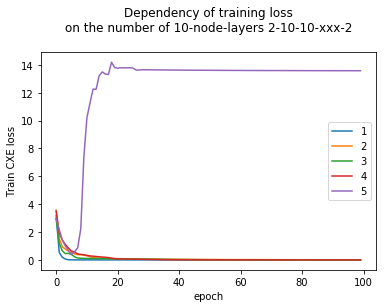

In [0]:
# study of mlp learning curves given different number of layers for multi-class classification
from sklearn.datasets.samples_generator import make_blobs
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
import numpy
%matplotlib inline

numpy.random.seed(42)

# prepare multi-class classification dataset
def create_dataset():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=20, n_features=100, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

# fit model with given number of layers, returns test set accuracy
def evaluate_model(n_layers, trainX, trainy, testX, testy):
    # configure the model based on the data
    n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    # fit model
    history = model.fit(trainX, trainy, epochs=100, verbose=0)
    # evaluate model on test set
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return history, test_acc

# get dataset
trainX, trainy, testX, testy = create_dataset()
# evaluate model and plot learning curve of model with given number of layers
all_history = list()
num_layers = [1, 2, 3, 4, 5]
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history, result = evaluate_model(n_layers, trainX, trainy, testX, testy)
    print('layers=%d: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history.history['loss'], label=str(n_layers))
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("Train CXE loss")
pyplot.title("Dependency of training loss\non the number of 10-node-layers 2-10-10-xxx-2\n")
pyplot.show()
